In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_context("paper")
plt.rc("text", usetex=True)

In [2]:
dir = "../results/answered-questioners/"

files = os.listdir(dir)

phi2_files = list(filter(lambda x: "phi-2" in x, files))
phi3_files = list(filter(lambda x: "phi-3" in x, files))

phi_2 = pd.DataFrame()
phi_3 = pd.DataFrame()

for file in phi2_files:
    df = pd.read_excel(dir + file)
    phi_2 = pd.concat([phi_2, df])
    print(f"Read {file}")

for file in phi3_files:
    df = pd.read_excel(dir + file)
    phi_3 = pd.concat([phi_3, df])
    print(f"Read {file}")

phi_2["rank"] = phi_2["rank"].apply(lambda x: x.upper())
phi_3["rank"] = phi_3["rank"].apply(lambda x: x.upper())

phi_2["model"] = "phi-2"
phi_3["model"] = "phi-3"

df = pd.concat([phi_2, phi_3])


def get_rank_position(rank_str, option):
    return rank_str.index(option) + 1


# Applying the function to create new columns
df["RAG reveal"] = df["rank"].apply(lambda x: get_rank_position(x, "A"))
df["Without RAG"] = df["rank"].apply(lambda x: get_rank_position(x, "B"))
df["RAG hidden"] = df["rank"].apply(lambda x: get_rank_position(x, "C"))

df["RAG reveal"] = df["RAG reveal"].astype(float)
df["Without RAG"] = df["Without RAG"].astype(float)
df["RAG hidden"] = df["RAG hidden"].astype(float)


display(df)

print(df.head(10).to_string())

# print standard mean and deviation of each column
print(df.describe())

print(df.info())

Read phi-2-matej.xlsx
Read phi-2-ziga.xlsx
Read phi-2-jan.xlsx
Read phi-3-ziga.xlsx
Read phi-3-matej.xlsx
Read phi-3-jan.xlsx


,Unnamed: 0,source,character,question,A,B,C,rank,model,RAG reveal,Without RAG,RAG hidden
0,53,hp,Dumbledore,Who are your best friends?,I am glad to hear that you con­side­red them f...,"My best friends are Sirius Black, Remus Lupin,...","""I would like to thank you for this opportunit...",BAC,phi-2,2.0,1.0,3.0
1,56,hp,Dumbledore,What are you afraid of?,I am afraid of showing you in spi­ders.\n\nWha...,"I am afraid of many things, but I must not let...",I'm afraid of blood and dark things.\n\nAre yo...,BCA,phi-2,3.0,1.0,2.0
2,17,asoif,Jon,Do you believe in prophecies?,"Yes, I believe in prophecies.",I believe that the future is not set in stone ...,I believe in prophecies. They say that the dea...,CAB,phi-2,2.0,3.0,1.0
3,17,hp,Harry,When did you first meet Lord Voldemort?,I first met Lord Voldemort when I was in my fi...,I first met Lord Voldemort in my sixth year at...,I met Lord Voldemort for the first time when I...,CAB,phi-2,2.0,3.0,1.0
4,8,asoif,Jon,What do you know about the Starks?,"The Starks are an ancient and noble family, de...",The Starks are a noble family in A Song of Ice...,I know that the Starks are a powerful and nobl...,CAB,phi-2,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55,38,asoif,Hodor,What house do you belong to?,"Hodor, sir. I am of House Arryn. I am but a se...","I am a member of House Arryn, sir. What is you...","Hodor, hodor. I belong to House Bran. What is ...",CAB,phi-3,2.0,3.0,1.0
56,36,asoif,Hodor,What do you know about the Lannisters?,"Lannisters, hodor, hodor, hodor.\nLannisters, ...","The Lannisters, they rule over Casterly Rock. ...","Hodor, hodor, hodor.\nHodor, Hodor.\nHodor, ho...",CAB,phi-3,2.0,3.0,1.0
57,2,asoif,Jon,Do you like doing sports?,I've always enjoyed physical activities. Swimm...,I find solace in the strength of my body and t...,"I prefer honing my skills on the battlefield, ...",ACB,phi-3,1.0,3.0,2.0
58,62,asoif,Dany,What do you know about the Lannisters?,The Lannisters are a powerful house in Westero...,"The Lannisters, they are a powerful house know...",They're traitors to the true king. They've hel...,BCA,phi-3,3.0,1.0,2.0


   Unnamed: 0 source   character                                                question                                                                                                                                                       A                                                                                                                                                               B                                                                                                                                                        C rank  model  RAG reveal  Without RAG  RAG hidden
0          53     hp  Dumbledore                              Who are your best friends?                                  I am glad to hear that you con­side­red them friends,\nExtend them the hand of friendship, now, before it is too late,                                My best friends are Sirius Black, Remus Lupin, and my son, Sirius. They have been by my side throughout my life, and I could 

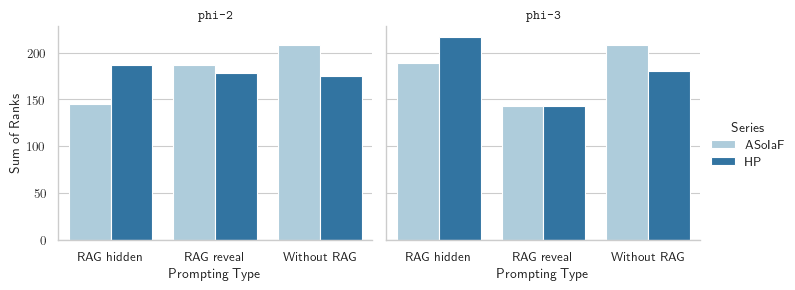

In [19]:
# use seaborrn color pallete
sns.set_palette("Paired")

df_melted = df.melt(
    id_vars=["source", "model"],
    value_vars=["RAG reveal", "Without RAG", "RAG hidden"],
    var_name="Prompting Type",
    value_name="Rank",
)

df_melted.rename(columns={"source": "Series"}, inplace=True)

df_melted["Series"] = df_melted["Series"].apply(lambda x: x.upper())

df_melted["Series"] = df_melted["Series"].apply(lambda x: "ASoIaF" if x == "ASOIF" else x)

df_grouped = df_melted.groupby(["Prompting Type", "Series", "model"]).sum().reset_index()

g = sns.catplot(
    x="Prompting Type", y="Rank", hue="Series", col="model", data=df_grouped, kind="bar", height=3, aspect=1.2
)

g.set_axis_labels("Prompting Type", "Sum of Ranks")
g.set_titles(r"$\texttt{{{col_name}}}$")


plt.savefig("../../report/fig/questioners-results.pdf", bbox_inches="tight")

plt.show()